In [1]:
import pandas as pd
import numpy as np
from dotenv import dotenv_values, find_dotenv
import matplotlib.pyplot as plt
import os
config = dotenv_values(find_dotenv())
path_cleandata = os.path.abspath(config["CLEANDATA"]) + '\\'
path_figures = os.path.abspath(config["FIGURES"]) + '\\'

In [3]:
# import my merged data
data = pd.read_pickle(path_cleandata + 'BEA6_naics6_merged.pkl')

In [4]:
# filter for the year 2017 
data2017 = data[data['date'].dt.year == 2017]

In [5]:
# personal consumption expenditures
data2017 = data2017[data2017['product_O'].str.contains('Personal consumption expenditures')][['product_I', 'date', 'IO_value', 'expenditures_I']]

In [6]:
# sum by product for that year
# first groupby: take sum of IO_value and mean of expenditures_I by date and product
byproduct = data2017.groupby(['product_I']).agg({
    'IO_value': 'mean',
    'expenditures_I': 'sum'}, min_count=1).reset_index()


In [7]:
len(set(data2017['product_I']))

122

## taking a look at how well the merge worked

In [8]:
# create distance variable
byproduct['distance'] = np.abs(byproduct['IO_value'] - byproduct['expenditures_I'])

# kinda "outliers" that have a very different value
outlier_threshold = 50000

# Filter only the points that are outliers
outliers = byproduct[byproduct['distance'] > outlier_threshold]

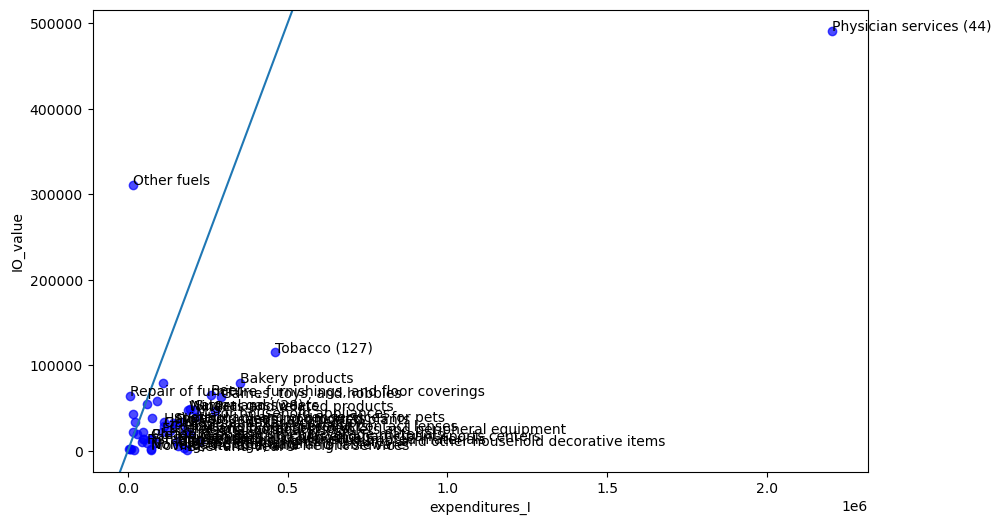

In [9]:
# do the scatter plot with expenditures on the x axis

plt.figure(figsize=(10, 6))
plt.scatter(byproduct['expenditures_I'], byproduct['IO_value'], c='blue', alpha=0.7)

plt.xlabel('expenditures_I')
plt.ylabel('IO_value')

ax = plt.gca()
ax.axline((0, 0), slope=1)

# annotations for outliers
for idx, row in outliers.iterrows():
    ax.annotate(row['product_I'].strip(), (row['expenditures_I'], row['IO_value']))

plt.savefig(path_figures + 'merge_check\\expenditures.pdf')

In [10]:
# this is the list of "outlier" products: issues mostly come from housing and healthcare type stuff
# noting the 2017 expenditures for tenant-occupied stationary houses is 0: having trouble getting min_count to work (actually all NaNs)
# within the merge, foreign travel in the United States gets matched with the rest-of-world adjustment in the IO table, which i should probably get rid of
outliers

,product_I,IO_value,expenditures_I,distance
4,Bakery products,79279.0,350581.0,271302.0
5,Beef and veal,97.0,184415.0,184318.0
6,Beer,65044.0,260176.0,195132.0
10,"Clocks, lamps, lighting fixtures, and other ho...",5824.0,157666.0,151842.0
12,"Coffee, tea, and other beverage materials",13961.0,72524.0,58563.0
15,Corrective eyeglasses and contact lenses,22990.0,130298.0,107308.0
24,Fish and seafood,8695.0,61377.0,52682.0
25,"Flowers, seeds, and potted plants",31499.0,149687.0,118188.0
30,Funeral and burial services,21338.0,106056.0,84718.0
31,"Games, toys, and hobbies",62205.0,290610.0,228405.0


In [11]:
# go into concordance, which shows some of the issues

concordance = pd.read_pickle(path_cleandata + 'concordance//concordance6_naics6.pkl')
outlierproducts = list(outliers['product_I'])

outliermerges = concordance[concordance['product'].isin(outlierproducts)]
outliermerges



,product,NAICS_desc,similarity
4,"Clocks, lamps, lighting fixtures, and other ho...",Lighting fixture manufacturing,0.557601
5,"Clocks, lamps, lighting fixtures, and other ho...",Household appliances and electrical and electr...,0.526547
6,"Clocks, lamps, lighting fixtures, and other ho...","Special tool, die, jig, and fixture manufacturing",0.498633
29,Major household appliances,Major household appliance manufacturing,0.756220
33,Membership clubs and participant sports centers,Spectator sports,0.633489
...,...,...,...
488,Wine,Wineries,0.785638
492,Other fuels,Petroleum and petroleum products,0.632038
493,Other fuels,Petroleum refineries,0.577304
494,Other fuels,Other petroleum and coal products manufacturing,0.573604


c:\Users\EmilyFu\.conda\envs\myenv\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


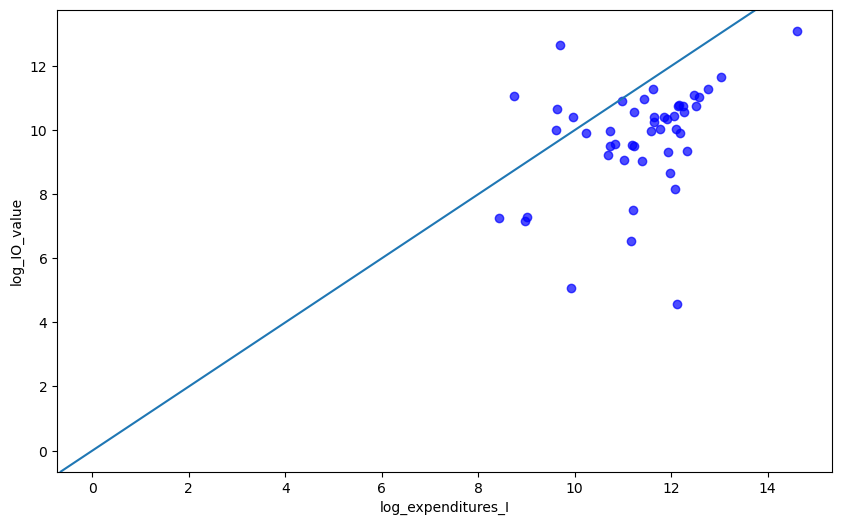

In [12]:
# get logs of everything and do an equivalent scatter plot with those

# do the scatter plot with expenditures on the x axis
plt.figure(figsize=(10, 6))
plt.scatter(np.log(byproduct['expenditures_I']), np.log(byproduct['IO_value']), c='blue', alpha=0.7)

plt.xlabel('log_expenditures_I')
plt.ylabel('log_IO_value')

ax = plt.gca()
ax.axline((0, 0), slope=1)

plt.savefig(path_figures + 'merge_check\\log_expenditures.pdf')
